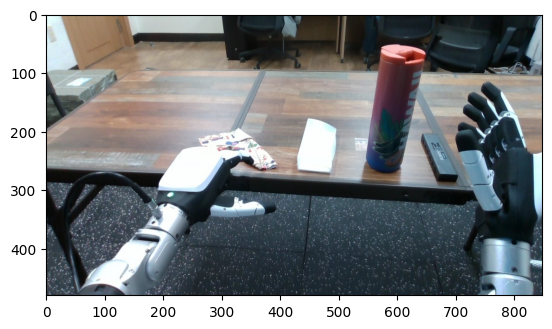

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
orig_img = cv2.imread('/home/scilab/Documents/teleoperation/avp_teleoperate/teleop/utils/datanalysis/episode_0001/colors/000000_color_0.jpg')

plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))


In [23]:
import cv2
import numpy as np

# 경로
bg_path = "/home/scilab/Documents/teleoperation/avp_teleoperate/teleop/utils/datanalysis/episode_0001/colors/000000_color_0.jpg"
l_path  = "/home/scilab/Documents/teleoperation/avp_teleoperate/img/l_inspirehand.png"

# 1) 이미지 로드
background    = cv2.imread(bg_path, cv2.IMREAD_COLOR)          # (480, 848, 3)
overlay_rgba  = cv2.imread(l_path, cv2.IMREAD_UNCHANGED)       # (?, ?, 4)   ← 알파 포함

# 2) 안전 체크
if background is None or overlay_rgba is None:
    raise RuntimeError("이미지를 읽지 못했습니다. 경로를 확인하세요.")

# 3) 리사이즈
overlay_rgba = cv2.resize(overlay_rgba, (100, 100))            # (100, 100, 4)

# 4) 알파 분리
bgr   = overlay_rgba[:, :, :3]
alpha = overlay_rgba[:, :, 3:] / 255.0     # 0‑1

# 5) 배경에 덮어쓰기 위치
x, y = 848 - 100 - 30, 480 - 100 - 30      # 우하단 30 px 여백

# 6) ROI 추출 & 블렌드
roi      = background[y:y+100, x:x+100]
blended  = (1 - alpha) * roi + alpha * bgr
background[y:y+100, x:x+100] = blended.astype(np.uint8)

# 7) 확인
cv2.imshow("result", background)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
